In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams

from mlforecast import MLForecast
from sklearn.neural_network import MLPRegressor

from src.data.loaders import CommodityLoader
from src.utils.split_series import split_series
from src.evaluation.evaluation import MetricEvaluator

In [29]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 
}
plt.rcParams.update(dark_style)

In [30]:
df_brl = CommodityLoader.load_all_commodities(currency='BRL', preprocessing=True, monthly_aggregation='mean', limit_date=None)

ദ്ദി・ᴗ・)✧ acucar_santos carregado com sucesso
ദ്ദി・ᴗ・)✧ acucar_sp carregado com sucesso
ദ്ദി・ᴗ・)✧ algodao carregado com sucesso
ദ്ദി・ᴗ・)✧ arroz carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_arabica carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_robusta carregado com sucesso
ദ്ദി・ᴗ・)✧ milho carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_paranagua carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_rs carregado com sucesso


In [31]:
df_brl.head()

,ds,y,unique_id
0,2020-01-01,73.428636,ACUCAR_SANTOS
1,2020-02-01,81.636111,ACUCAR_SANTOS
2,2020-03-01,79.906364,ACUCAR_SANTOS
3,2020-04-01,77.113500,ACUCAR_SANTOS
4,2020-05-01,84.638500,ACUCAR_SANTOS


In [32]:
train, val, test = split_series(df_brl)

Splitted data into TRAIN with size 1605, VALIDATION with size 406 and TEST with size 868


In [33]:
model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

fcst = MLForecast(
    models={'mlp': model},
    lags=[1, 2],
    freq='MS'
)

In [34]:
# start tunning here if needed eventually

In [35]:
full_train = pd.concat([train, val])

In [36]:
fcst.fit(full_train)

MLForecast(models=[mlp], freq=MS, lag_features=['lag1', 'lag2'], date_features=[], num_threads=1)

In [37]:
# Rollout
forecasts = []
for i in range(len(test)):
    f_next = fcst.predict(h=1)
    forecasts.append(f_next)

    # add real value
    obs = test.iloc[[i]][['unique_id', 'ds', 'y']]
    fcst.update(obs)

In [38]:
forecasts_df = pd.concat(forecasts, ignore_index=True)

In [39]:
evaluator = MetricEvaluator()

In [40]:
results = evaluator.evaluate_multiple(
    forecasts_df=forecasts_df,    
    actual_df=test,                
    model_columns=['mlp'],         
    groupby_column='unique_id'     
)

print(results)

         unique_id Model  n_observations        MAE      MAPE          MSE  \
0    ACUCAR_SANTOS   mlp              20   8.032819  0.054196    93.824155   
1        ACUCAR_SP   mlp             100   3.670822  0.033826    22.928243   
2          ALGODAO   mlp             205  12.184869  0.034907   371.599420   
3            ARROZ   mlp             277   3.142871  0.059243    14.022963   
4     CAFE_ARABICA   mlp             381  17.966533  0.023969  1522.618391   
5     CAFE_ROBUSTA   mlp             468  15.350432  0.034369   999.506475   
6            MILHO   mlp             543   3.387428  0.079836    13.037525   
7      SOJA_PARANA   mlp             644   4.489972  0.058306    23.837518   
8   SOJA_PARANAGUA   mlp             714   6.369731  0.072176    42.852062   
9     TRIGO_PARANA   mlp             791  17.408383  0.017822   696.689859   
10        TRIGO_RS   mlp             868   8.032850  0.007623   533.884592   

         RMSE        R2  
0    9.686287  0.242646  
1    4.7883

In [41]:
summary = evaluator.get_summary_stats(results)
print("\n=== Estatísticas Resumo ===")
print(summary)


=== Estatísticas Resumo ===
          MAE                                     MAPE                         \
         mean     std     min      max  median    mean    std     min     max   
Model                                                                           
mlp    9.0942  5.6992  3.1429  17.9665  8.0328  0.0433  0.023  0.0076  0.0798   

                    MSE                                           RMSE  \
       median      mean      std      min        max   median     mean   
Model                                                                    
mlp    0.0349  394.0728  502.966  13.0375  1522.6184  93.8242  15.6975   

                                             R2                                 
           std     min      max  median    mean    std     min     max  median  
Model                                                                           
mlp    12.7448  3.6108  39.0207  9.6863  0.8974  0.219  0.2426  0.9854  0.9733  


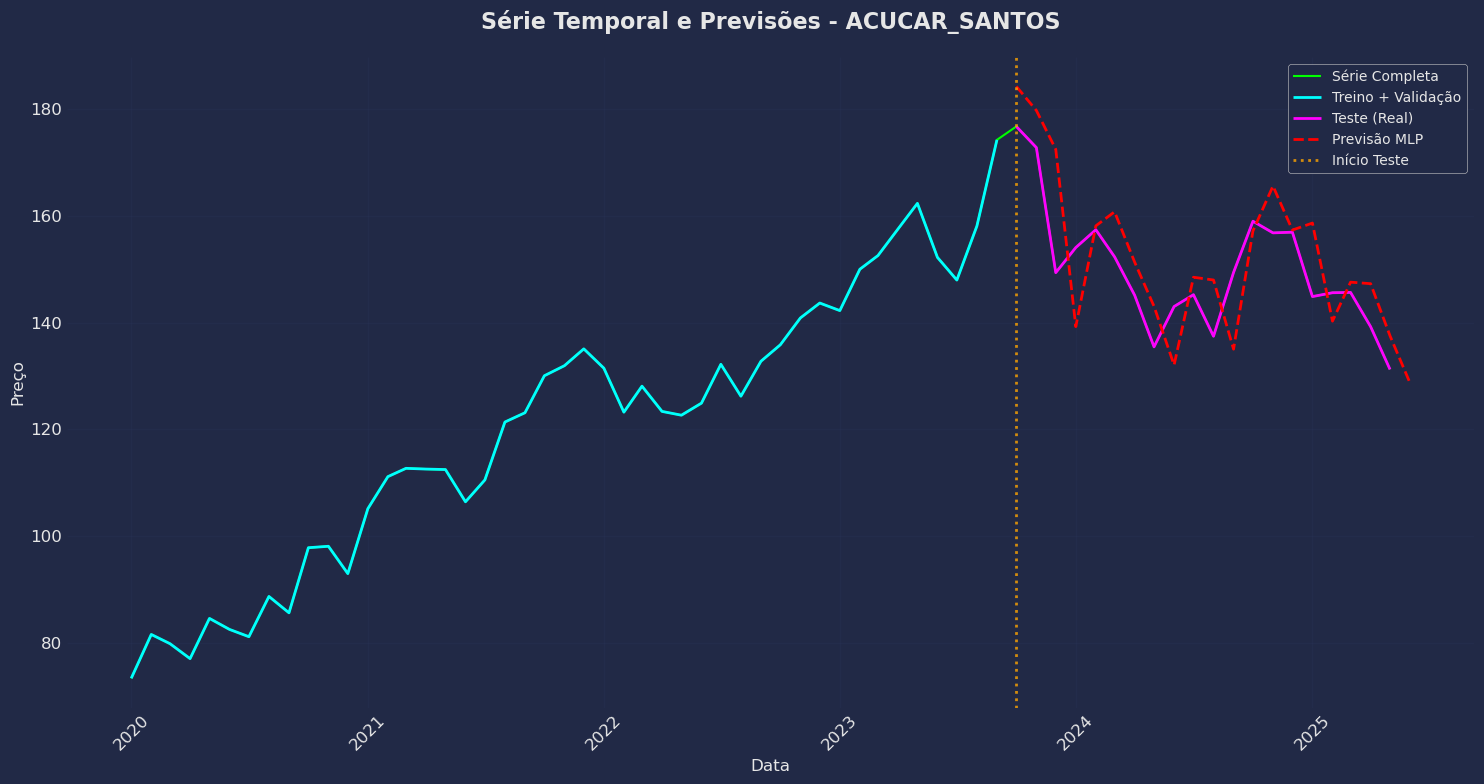

Gráfico exibido para: ACUCAR_SANTOS
--------------------------------------------------


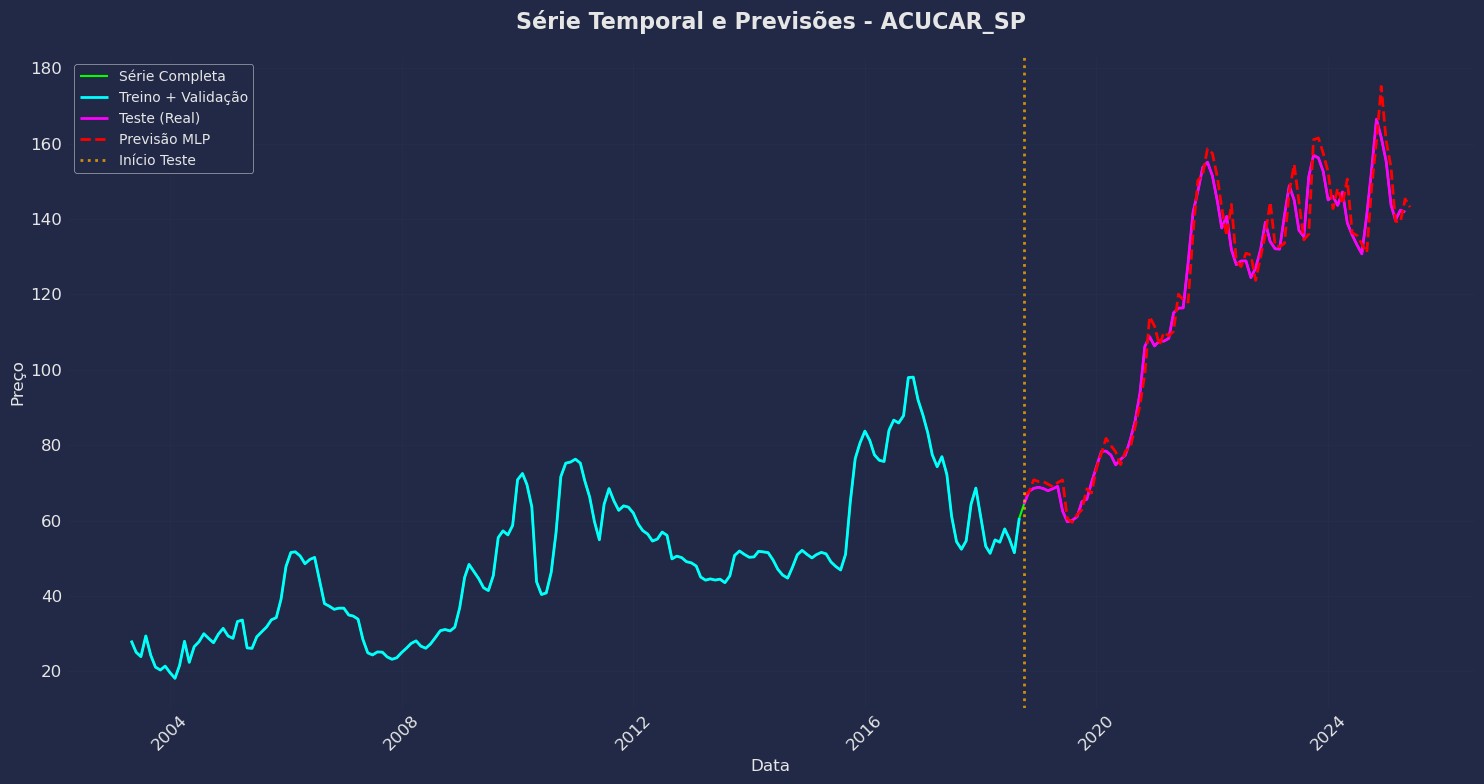

Gráfico exibido para: ACUCAR_SP
--------------------------------------------------


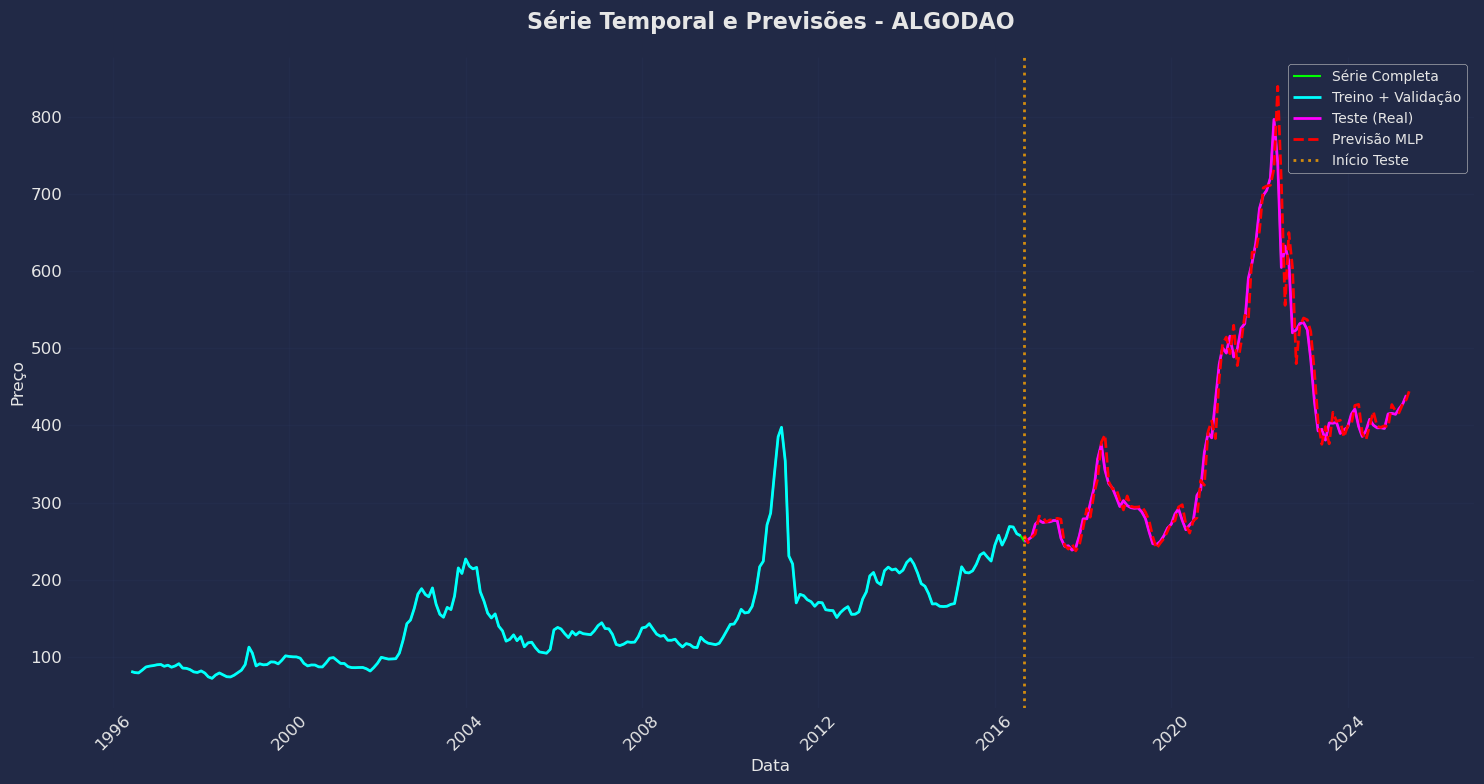

Gráfico exibido para: ALGODAO
--------------------------------------------------


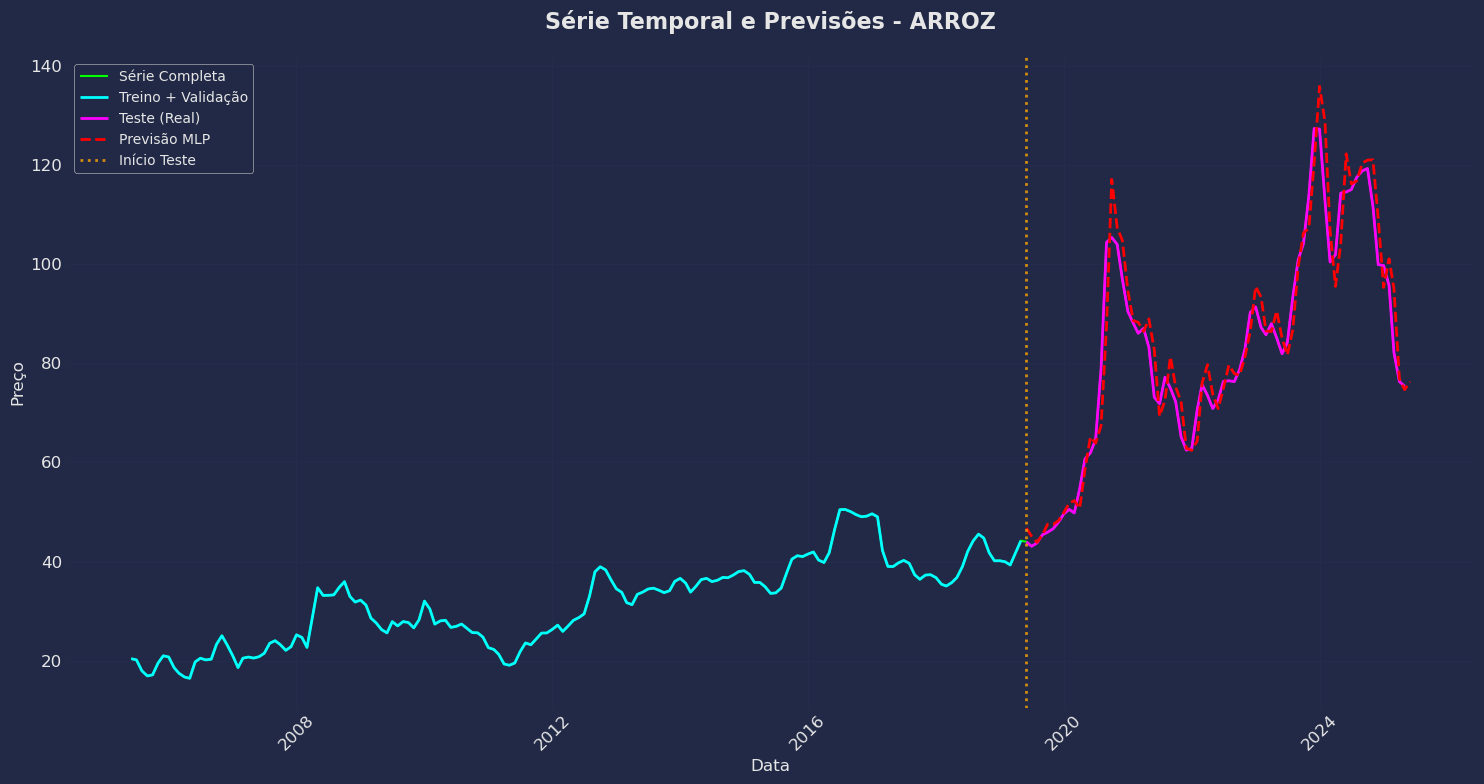

Gráfico exibido para: ARROZ
--------------------------------------------------


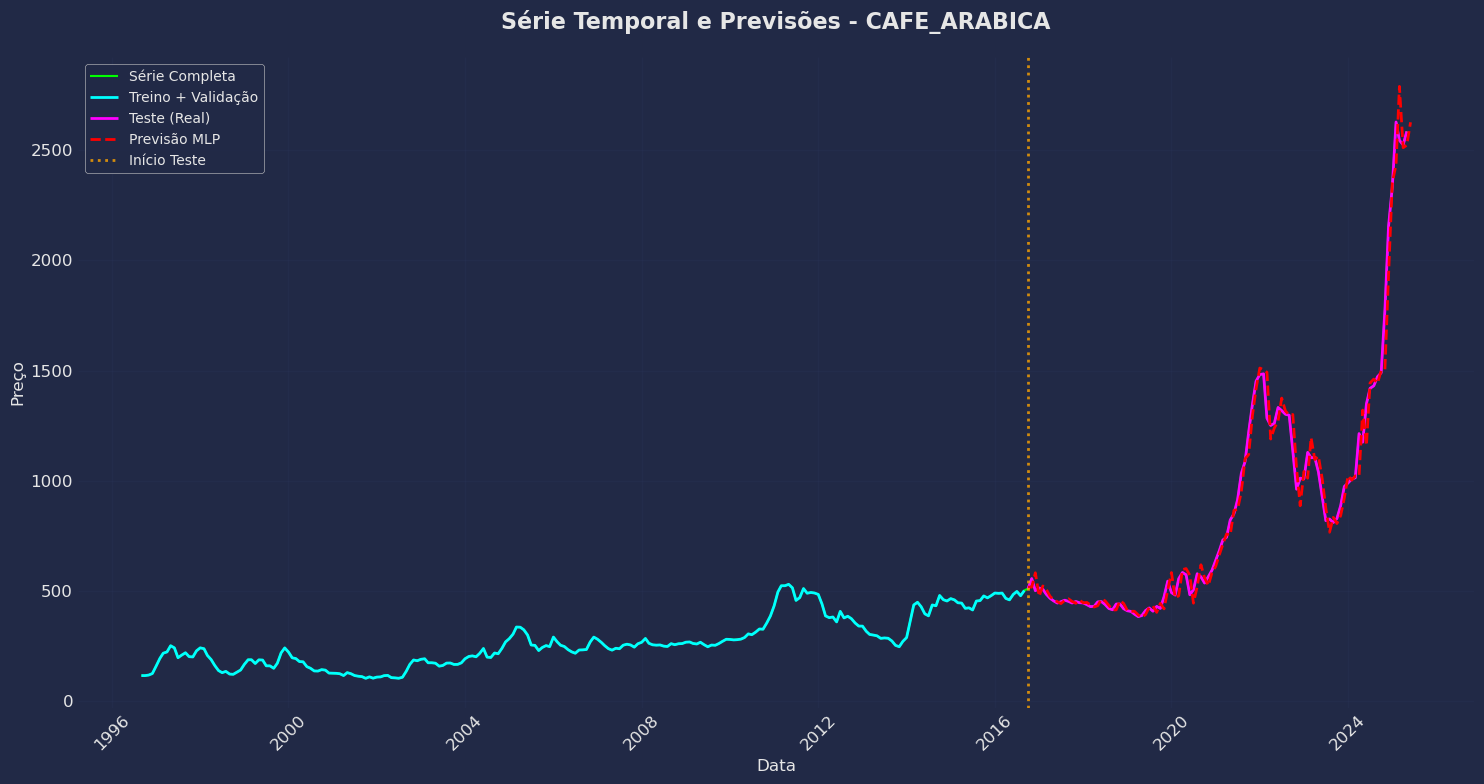

Gráfico exibido para: CAFE_ARABICA
--------------------------------------------------


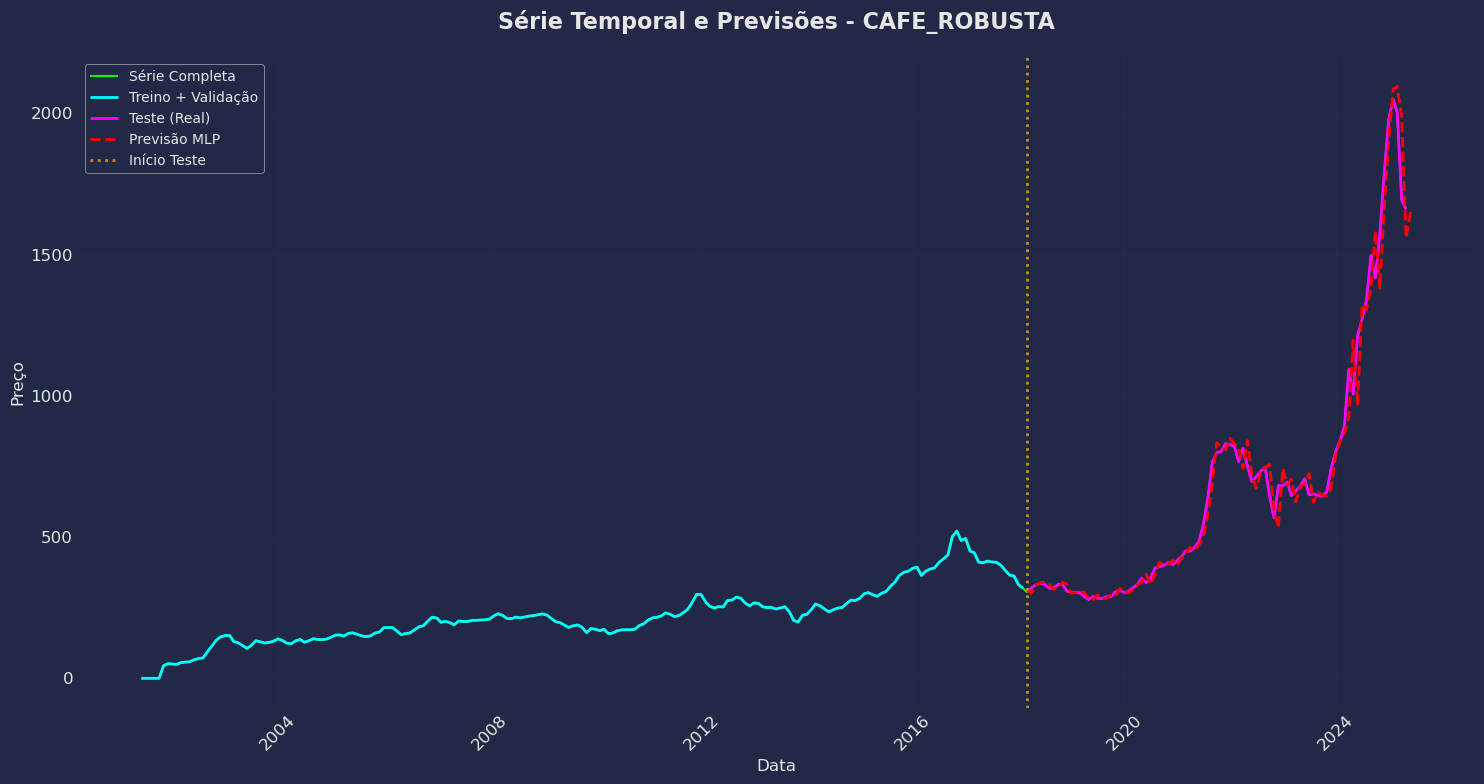

Gráfico exibido para: CAFE_ROBUSTA
--------------------------------------------------


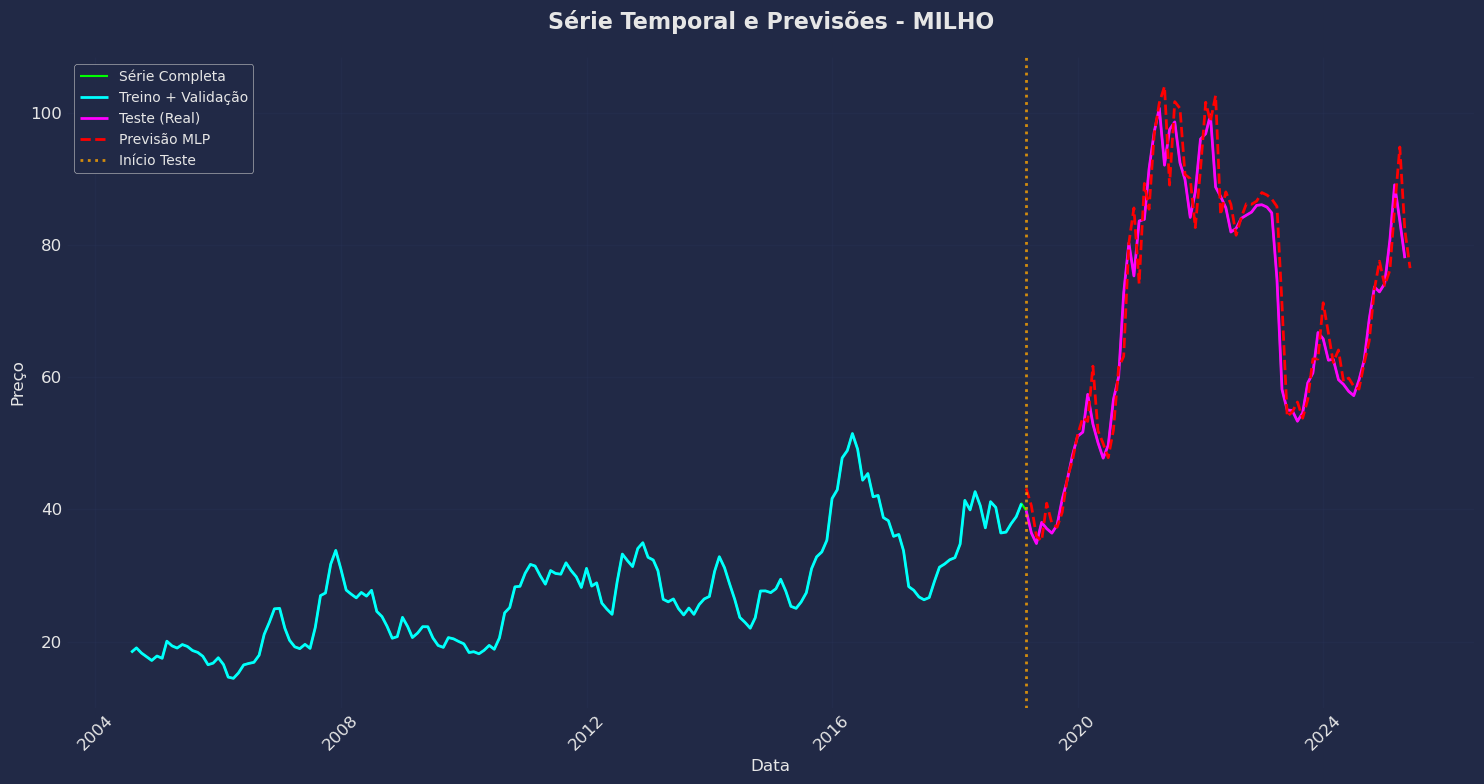

Gráfico exibido para: MILHO
--------------------------------------------------


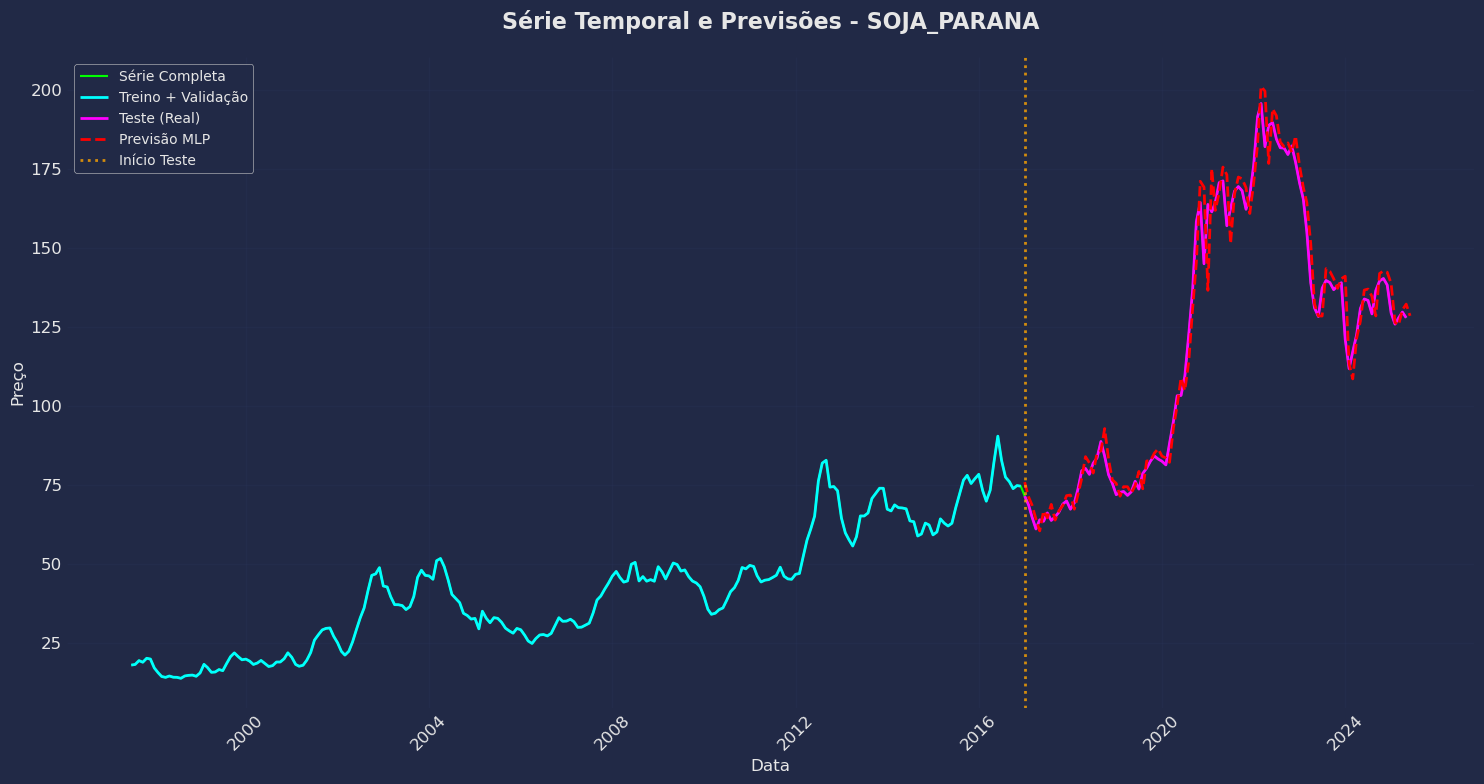

Gráfico exibido para: SOJA_PARANA
--------------------------------------------------


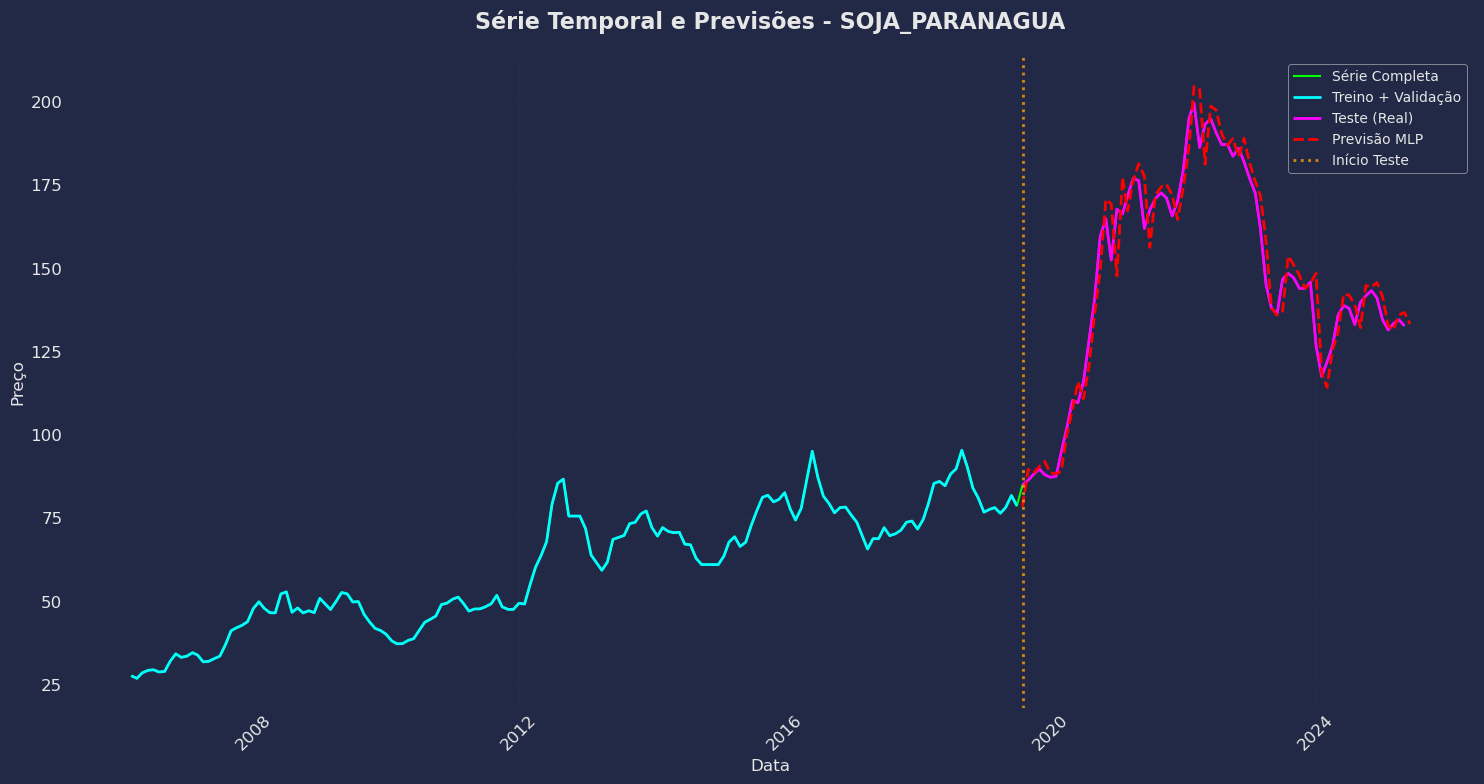

Gráfico exibido para: SOJA_PARANAGUA
--------------------------------------------------


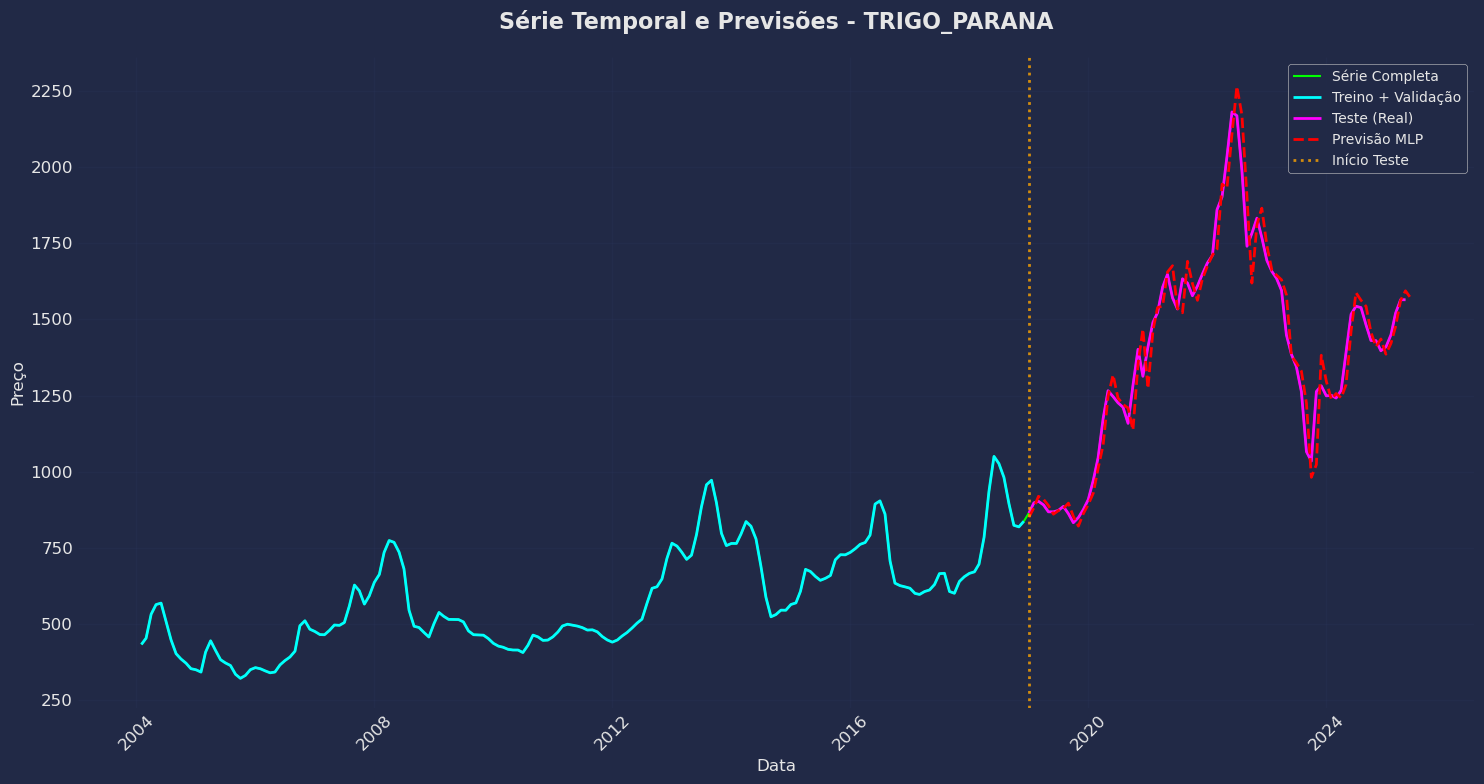

Gráfico exibido para: TRIGO_PARANA
--------------------------------------------------


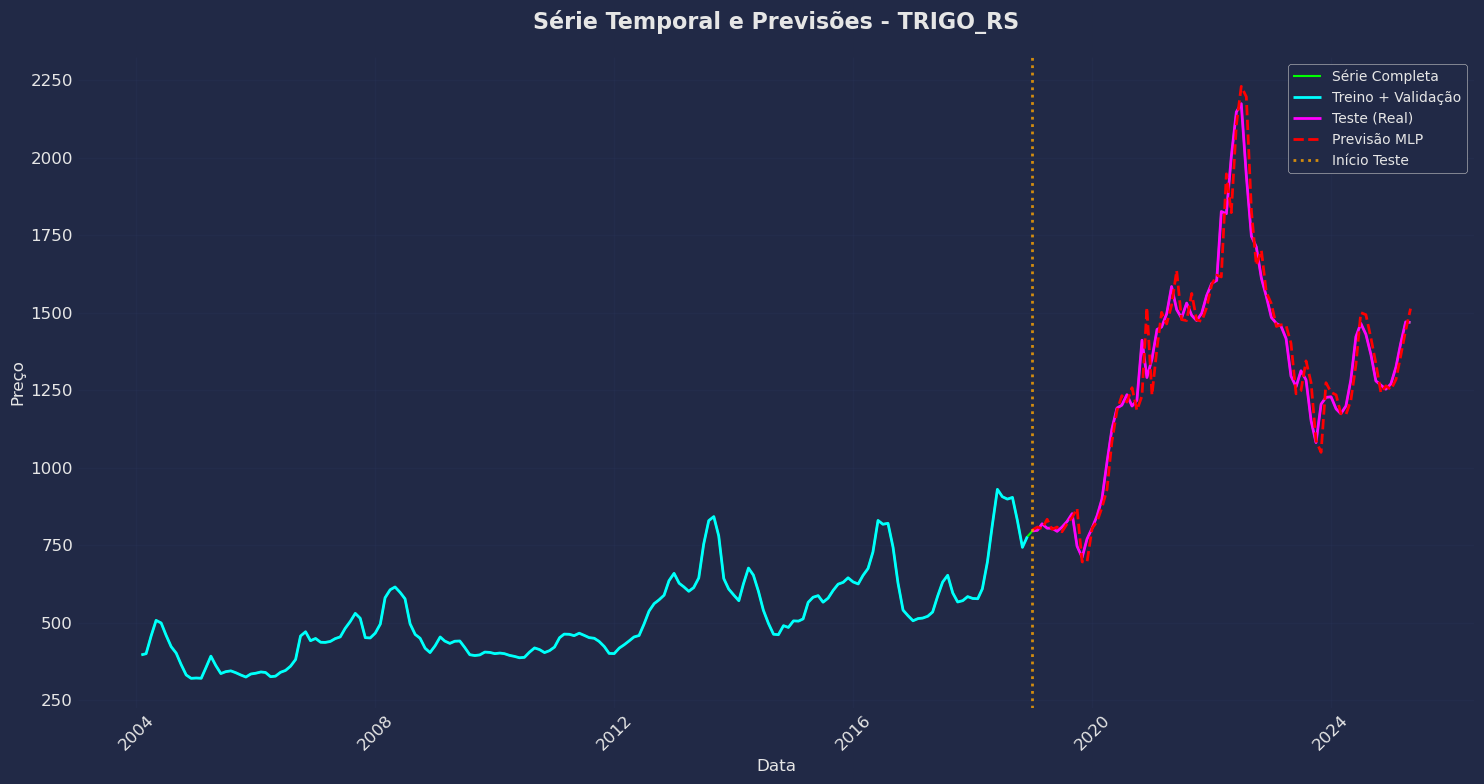

Gráfico exibido para: TRIGO_RS
--------------------------------------------------


In [43]:
def plot_series_and_forecasts(df_brl, full_train, test, forecasts_df):
    """
    Plota a série completa e as previsões para cada commodity individualmente
    """
    unique_ids = df_brl['unique_id'].unique()
    
    for uid in unique_ids:
        fig, ax = plt.subplots(1, 1, figsize=(15, 8))
        
        series_data = df_brl[df_brl['unique_id'] == uid].copy()
        train_data = full_train[full_train['unique_id'] == uid].copy()
        test_data = test[test['unique_id'] == uid].copy()
        forecast_data = forecasts_df[forecasts_df['unique_id'] == uid].copy()
        
        ax.plot(series_data['ds'], series_data['y'], 
                color='lime', linewidth=1.5, label='Série Completa')
        
        ax.plot(train_data['ds'], train_data['y'], 
                color='cyan', linewidth=2, label='Treino + Validação')
        
        ax.plot(test_data['ds'], test_data['y'], 
                color='fuchsia', linewidth=2, label='Teste (Real)')
        
        ax.plot(forecast_data['ds'], forecast_data['mlp'], 
                color='red', linewidth=2, linestyle='--', label='Previsão MLP')
        
        if len(test_data) > 0:
            ax.axvline(x=test_data['ds'].iloc[0], color='orange', 
                      linestyle=':', alpha=0.8, linewidth=2, label='Início Teste')
        
        ax.set_title(f'Série Temporal e Previsões - {uid}', 
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Data', fontsize=12)
        ax.set_ylabel('Preço', fontsize=12)
        ax.legend(fontsize=10, loc='best')
        ax.grid(True, alpha=0.3)
        
        ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        
        plt.show()
        
        print(f"Gráfico exibido para: {uid}")
        print("-" * 50)

plot_series_and_forecasts(df_brl, full_train, test, forecasts_df)